# Hypothesis Testing

This notebook is going to cover **hypothesis testing**, which measures whether a finding is likely to have occurred by chance rather than because of a hypothesized variable. Think of testing a new drug that is supposed to reduce the duration of a cold. If the average time of recovery with the drug is less than the average time without the drug, it has to be enough of a difference so that it's unlikely to have been due to random chance. It could very well be the drug had no effect. 

Let's get some intuition first by exploring the most critical building block for this reasoning: the p-value.

## P-Value Intuition

When somebody says something is statistically significant, what does that mean? It is a phrase thrown around a lot, but few people stop and articulate how statistical significance works on a mathematical level. To understand statistical significance, we can go back to the invention of the p-value in 1925. 

A mathematician named Ronald Fisher was at a party. One of his colleagues Muriel Bristol claimed she could detect when tea was poured before milk simply by tasting it. Intrigued by the claim, Ronald set up an experiment on the spot.

He prepared eight cups of tea. Four had milk poured first; the other four had tea poured first. He then asked her to identify the pour order of each. Remarkably, she identified them all correctly, and if she was simply guessing the probability of this happening by chance is 1 in 70, or 0.01428571. This is what we call the **p-value**, the probablity something happened by random luck rather than because of a hypothesized explanation. 

svg image

When you have a p-value that's very low (conventionally < 0.05), that indicates the event was unlikely to have happened by random chance. Therefore we are inclined to think that Muriel has this special ability to detect when tea was poured before the milk, because if she was just randomly guessing she only had a 1.42% chance of succeeding. 

This example does not capture every nuance of a p-value, but it does provide the essence of it. Let's see how this concept applies with a sample mean and the normal distribution. 

## Two-Tailed Testing

Let's bring in the lightbulb dataset and calculate its mean, standard deviation, and count. 

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np 

X = pd.read_csv("https://raw.githubusercontent.com/thomasnield/machine-learning-demo-data/master/distribution/lightbulb_data.csv") \
    .squeeze()
X

mean, std, n = X.mean(), X.std(), X.count()
print("MEAN: ", mean)
print("STD: ", std)
print("n: ", n)

MEAN:  672.2
STD:  51.48062775022316
n:  150


Based on this data, we can infer that there is a 95% probability the lightbulb will last approximately between 571.3 hours and 773.1 hours as shown below. 

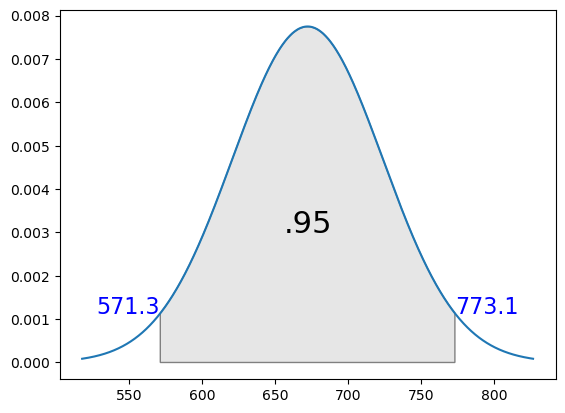

In [102]:
from matplotlib.patches import Polygon

fig, ax = plt.subplots()
x_range = np.arange(mean-std*3, mean+std*3, .01) 
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

# .95 area 
a,b = norm.ppf(.025, mean, std), norm.ppf(.975, mean, std)
ix = np.linspace(a, b)
iy =  norm.pdf(ix, mean, std)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

# add text labels
plt.text(mean, .003, '.95', fontsize = 22, ha='center')
plt.text(a, norm.pdf(a,mean,std), round(a,2), fontsize = 16, ha='right', color='blue')
plt.text(b, norm.pdf(b,mean,std), round(b,2), fontsize = 16, ha='left', color='blue')


plt.show()

We can calculate that center range capturing the .95 area by using the inverse cumulative density function (the `ppf()` function in SciPy) as shown below. 

In [42]:
from scipy.stats import norm

print(norm.ppf(.025, mean, std), norm.ppf(.975, mean, std))

571.2998237080494 773.1001762919507


Let's say an engineer made a design change and tested 31 light bulbs with this new design tweak. He happily reports that the mean in this new sample is 790. Now consider this... is this a coincidence? Let's look at this new mean compared to our current distribution of lightbulb lifespans. 

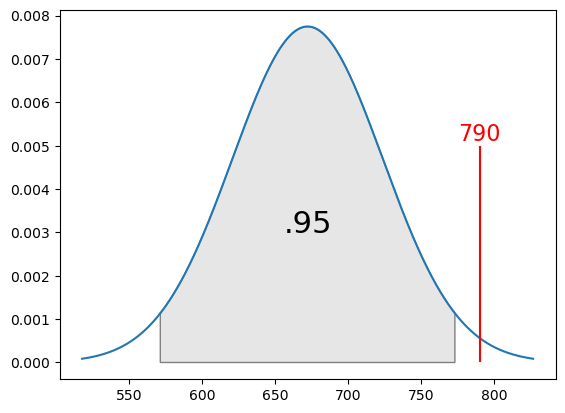

In [53]:
from matplotlib.patches import Polygon

new_mean = 790

# plot chart
fig, ax = plt.subplots()
x_range = np.arange(mean-std*3, mean+std*3, .01) 
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

# .95 area 
a,b = norm.ppf(.025, mean, std), norm.ppf(.975, mean, std)
ix = np.linspace(a, b)
iy =  norm.pdf(ix, mean, std)
verts = [(a, 0), *zip(ix, iy), (b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

# add text labels
plt.vlines(x = new_mean, ymin = 0, ymax = .005,
           colors = 'red',
           label = r"\bar{x}_{new}")

plt.text(mean, .003, '.95', fontsize = 22, ha='center')
plt.text(new_mean, .005, round(new_mean,2), fontsize = 16, ha='center', va='bottom', color='red')


plt.show()

Hmm... take notice here that if we want to be 95% confident that the engineering change had an effect, logically the mean of the new sample must fall outside that .95 range (due to the central limit theorem). Therefore, we are inclined to believe with 95% confidence that the engineering change did improve the design.

Let's formalize these ideas a bit more.  We claim the **null hypothesis ($ H_0 $)** is the status quo: the mean is 672.2 and the engineering change had no effect. But the **alternative hypothesis ($ H_1 $)** is the mean *is not* 672.2 with the new engineering design, and we believe it did have an effect enough to reject the null hypothesis. 

Because this new mean of 790 does fall outside that 95% confidence range, we call it **statistically significant**, meaning it is unlikely to be coincidental enouugh that we can reject the null hypothesis and promote the alternative hypothesis. 

But *how unlikely* is it we would have observed 790 with the current lightbulb design? We can roughly say it falls outside the 95% "coincidence" range as shown above, but by how much? This is where the **p-value** once again comes in. Let's take a look at area left over in each tail, which is going to be $ .025 $. 

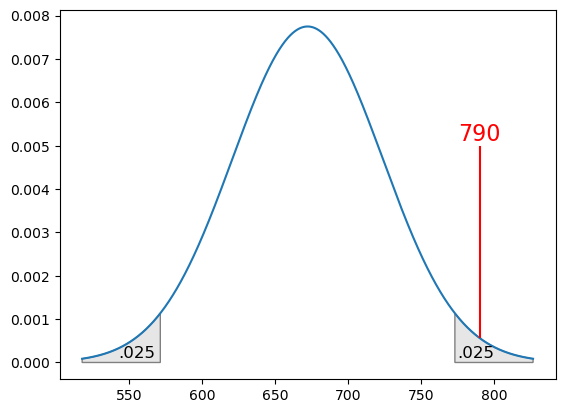

In [83]:
from matplotlib.patches import Polygon

new_mean = 790

# plot chart
fig, ax = plt.subplots()
x_range = np.arange(mean-std*3, mean+std*3, .01) 
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

def plot_tail(a, b): 
    # p-value areas
    ix = np.linspace(a, b)
    iy = norm.pdf(ix, mean, std)
    verts = [(a, 0), *zip(ix, iy), (b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

plot_tail(mean-std*3, norm.ppf(.025, mean, std))
plot_tail(norm.ppf(.975, mean, std), mean+std*3)

# add text labels
plt.vlines(x = new_mean, ymin = norm.pdf(new_mean, mean, std), ymax = .005,
           colors = 'red',
           label = r"\bar{x}_{new}")

plt.text(555, .0001, '.025', fontsize = 12, ha='center')
plt.text(775, .0001, '.025', fontsize = 12, ha='left')
plt.text(new_mean, .005, round(new_mean,2), fontsize = 16, ha='center', va='bottom', color='red')


plt.show()

However, this is not our p-value. The p-value has to capture any probability that is of equal or less value on both sides where we observed the new mean.  After all, we are trying to prove significance, and that includes anything that is equally or less likely to happen. Let's visualize just that area on both sides, which in total will be the p-value. 

0.02212358425605565


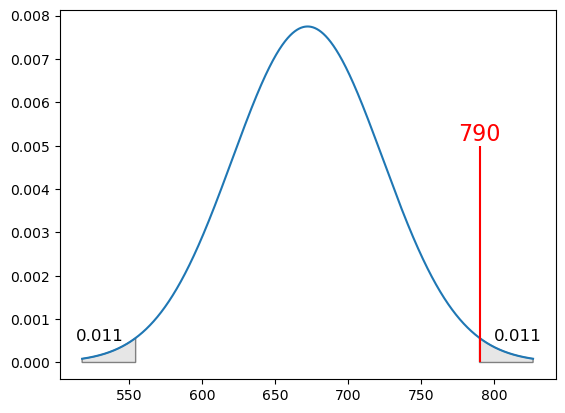

In [97]:
from matplotlib.patches import Polygon

new_mean = 790

# plot chart
fig, ax = plt.subplots()
x_range = np.arange(mean-std*3, mean+std*3, .01) 
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

def plot_tail(a, b): 
    # p-value areas
    ix = np.linspace(a, b)
    iy = norm.pdf(ix, mean, std)
    verts = [(a, 0), *zip(ix, iy), (b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

plot_tail(mean-std*3, norm.ppf(1.0 - norm.cdf(new_mean, mean, std), mean, std))
plot_tail(new_mean, mean+std*3)

# add text labels
plt.vlines(x = new_mean, ymin = 0, ymax = .005,
           colors = 'red',
           label = r"\bar{x}_{new}")

one_side_p_value  = 1.0 - norm.cdf(new_mean, mean, std)
print(one_side_p_value*2)
plt.text(530, .0005, round(one_side_p_value, 3), fontsize = 12, ha='center')
plt.text(800, .0005, round(one_side_p_value, 3), fontsize = 12, ha='left')
plt.text(new_mean, .005, round(new_mean,2), fontsize = 16, ha='center', va='bottom', color='red')


plt.show()

So we are left  approximately with a p-value of $ 0.022 $, which is divided to both tails as $ 0.011 $. While trying to identify the ranges of these tails requires some deductive math and a bit of code, calculating the p-value itself can be done in two lines of code. We can simply calculate the area of the right tail using the CDF at the new sample mean (and subtract from 1.0 to get the right area, not the left), and then doubling it to take advantage of the symmetry of the left tail. 

In [100]:
# area of right tail 
p_value_right_tail = 1.0 -  norm.cdf(new_mean, mean, std)

# p-value of both tails (symmetrical)
p_value = p_value_right_tail*2 

print(p_value) # 0.02212358425605565

0.02212358425605565


So practically speaking, how do we interpet this p-value? We say that the re-enginerred lightbulb life span of 790  is 2.2% likely to have happened by chance (including probability of equally or less likely events). If our threshold is 95% confidence, or a 5% level of significance, $ 0.022 $ is less than $ 0.05 $ so we can reject our null hypothesis, and promote the alternative hypothesis that our re-engineered lightbulb is an improvement. 

Alternatively, let's say the new lightbulb only improved the sample mean to 750. Notice below this would not be in the "statistically significant" range even though it is higher than the current mean  of 672.2. 

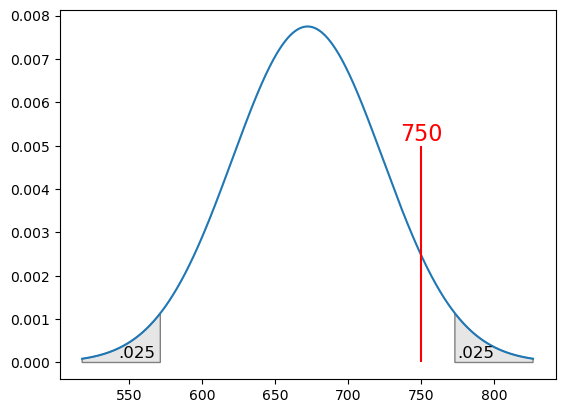

In [106]:
from matplotlib.patches import Polygon

new_mean = 750

# plot chart
fig, ax = plt.subplots()
x_range = np.arange(mean-std*3, mean+std*3, .01) 
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

def plot_tail(a, b): 
    # p-value areas
    ix = np.linspace(a, b)
    iy = norm.pdf(ix, mean, std)
    verts = [(a, 0), *zip(ix, iy), (b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

plot_tail(mean-std*3, norm.ppf(.025, mean, std))
plot_tail(norm.ppf(.975, mean, std), mean+std*3)

# add text labels
plt.vlines(x = new_mean, ymin = 0, ymax = .005,
           colors = 'red',
           label = r"\bar{x}_{new}")

plt.text(555, .0001, '.025', fontsize = 12, ha='center')
plt.text(775, .0001, '.025', fontsize = 12, ha='left')
plt.text(new_mean, .005, round(new_mean,2), fontsize = 16, ha='center', va='bottom', color='red')


plt.show()

At a 95% threshold, we cannot attribute this lightbulb to perform significantly better than the current one because there's a good chance it was just by random luck and performs the same as the current lightbulb. How much of a chance? Well again, that is the p-value and we can calculate that. We find it is $ 0.13 $, and that is much higher than $ 0.05 $. Therefore we cannot reject the null hypothesis. 

In [107]:
new_mean = 750 

# area of right tail 
p_value_right_tail = 1.0 -  norm.cdf(new_mean, mean, std)

# p-value of both tails (symmetrical)
p_value = p_value_right_tail*2 

print(p_value) # 0.13072525593787487

0.13072525593787487


And just for good measure, here is the p-value area visualized for a new sample mean of 750. 

0.13072525593787487


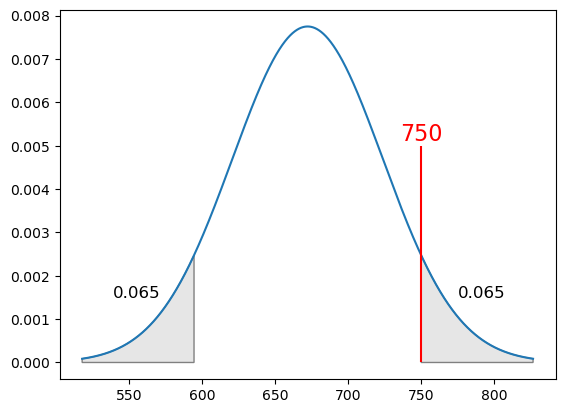

In [113]:
from matplotlib.patches import Polygon

new_mean = 750

# plot chart
fig, ax = plt.subplots()
x_range = np.arange(mean-std*3, mean+std*3, .01) 
ax.plot(x_range, norm.pdf(x_range, mean, std)) # bell curve 

def plot_tail(a, b): 
    # p-value areas
    ix = np.linspace(a, b)
    iy = norm.pdf(ix, mean, std)
    verts = [(a, 0), *zip(ix, iy), (b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    ax.add_patch(poly)

plot_tail(mean-std*3, norm.ppf(1.0 - norm.cdf(new_mean, mean, std), mean, std))
plot_tail(new_mean, mean+std*3)

# add text labels
plt.vlines(x = new_mean, ymin = 0, ymax = .005,
           colors = 'red',
           label = r"\bar{x}_{new}")

one_side_p_value  = 1.0 - norm.cdf(new_mean, mean, std)
print(one_side_p_value*2)
plt.text(555, .0015, round(one_side_p_value, 3), fontsize = 12, ha='center')
plt.text(775, .0015, round(one_side_p_value, 3), fontsize = 12, ha='left')
plt.text(new_mean, .005, round(new_mean,2), fontsize = 16, ha='center', va='bottom', color='red')


plt.show()